In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$
$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$
---


ingrese la velocidad de la moto en m/s: 15
ingrese la aceleracion del policia en m/s^2: 3


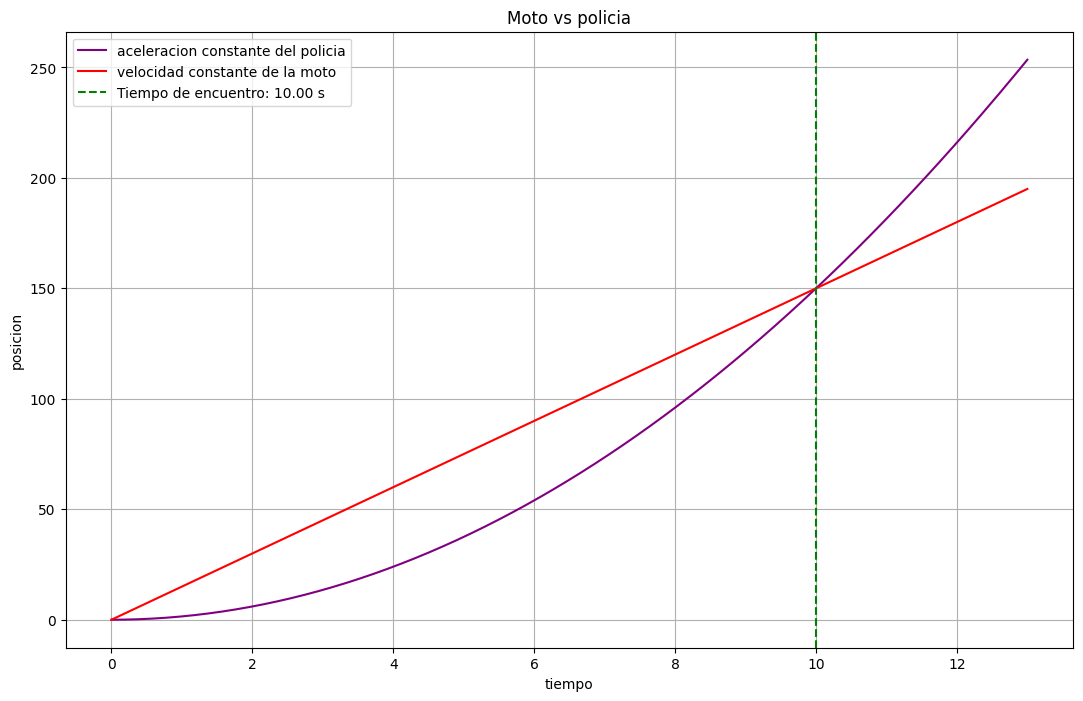

In [114]:
velocidad_moto = float(input("ingrese la velocidad de la moto en m/s: "))
aceleracion_policia = float(input("ingrese la aceleracion del policia en m/s^2: "))

tiempo = 2*velocidad_moto/aceleracion_policia
t = np.linspace(0,tiempo+3,200)
xp = 0.5*(aceleracion_policia)*np.power(t,2)
xm = velocidad_moto*t

plt.figure(figsize = (13,8))
plt.title("Moto vs policia")
plt.xlabel("tiempo")
plt.ylabel("posicion")
plt.plot(t,xp, label ="aceleracion constante del policia",color = "purple" )
plt.plot(t,xm, label = "velocidad constante de la moto",color = "red" )
plt.axvline(x = tiempo, color="green", linestyle="--", label=f"Tiempo de encuentro: {tiempo:.2f} s")
plt.grid()
plt.legend()
plt.show()


2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.

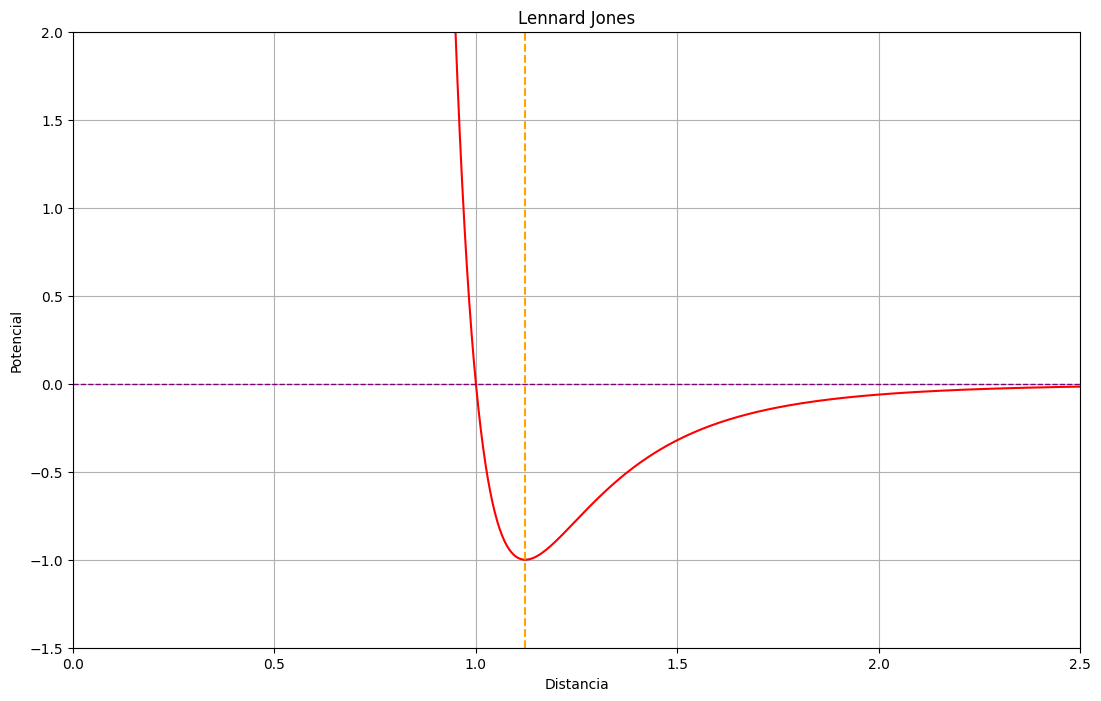

In [26]:
σ = 1
ϵ = 1

def LJ(ϵ,σ,r):
  V = 4*ϵ*((np.power(σ,12)/np.power(r,12))-(np.power(σ,6)/np.power(r,6)))
  return V

Distancia = np.linspace(0.1,3,500)
potencial = LJ(ϵ,σ,Distancia)

plt.figure(figsize =(13,8))
plt.plot(Distancia,potencial,label = "Potencial", color = "red")
plt.axvline(x =(np.power(2,1/6)*σ) , color = "orange", linestyle="--", label ="Distancia en equilibrio" )
plt.axhline(0 , color = "purple", lw=1,ls = "--")
plt.title("Lennard Jones")
plt.xlabel("Distancia")
plt.ylabel("Potencial")
plt.xlim(0, 2.5)
plt.ylim(-1.5,2.0)
plt.grid(True)
plt.show()

In [35]:
sigmas = (0.5,1.5,2.5,3.5)
ϵ = 1
rm = []

for sigma in sigmas:
  r = (np.power(2,1/6)*sigma)
  rm.append(r)

for sigma, r in zip(sigmas,rm):
  print(f"para sigma = {sigma}, r_m = {r:.4f}")

para sigma = 0.5, r_m = 0.5612
para sigma = 1.5, r_m = 1.6837
para sigma = 2.5, r_m = 2.8062
para sigma = 3.5, r_m = 3.9286


3.  El siguiente código exporta tablas html de sitios web

In [57]:
# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.

In [58]:
alturas

,Country,"Average Height, Boys, 19 yo (cm)",Girls 19 (cm),Boys 19 (in),Girls 19 (in),Boys 15 (cm),Girls 15 (cm),Boys 10 (cm),Girls 10 (cm),Boys 5 (cm),Girls 5 (cm)
0,Netherlands,183.78,170.36,6 ft.,5 ft. 7 in.,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,6 ft.,5 ft. 7 in.,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,6 ft.,5 ft. 6 in.,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,6 ft.,5 ft. 6 in.,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,6 ft.,5 ft. 7 in.,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,5 ft. 4 in.,5 ft. 2 in.,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,5 ft. 4 in.,5 ft. 2 in.,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,5 ft. 4 in.,5 ft.,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,5 ft. 3 in.,5 ft.,154.15,150.11,125.94,131.02,99.62,103.98


In [59]:
altura = alturas.drop(["Boys 19 (in)","Girls 19 (in)"], axis = 1)
alturas_español = altura.rename(columns={"Country": "País",
                                         "Average Height, Boys, 19 yo (cm)":"Chicos 19 (cm)",
                                         "Girls 19 (cm)":"Chicas 19 (cm)",
                                         "Boys 15 (cm)":"Chicos 15 (cm)",
                                         "Girls 15 (cm)":"Chicas 15 (cm)",
                                         "Boys 10 (cm)":"Niños 10 (cm)",
                                         "Girls 10 (cm)":"Niñas 10 (cm)",
                                         "Boys 5 (cm)":"Niños 5 (cm)",
                                         "Girls 5 (cm)":"Niñas 5 (cm)"})
alturas_español

,País,Chicos 19 (cm),Chicas 19 (cm),Chicos 15 (cm),Chicas 15 (cm),Niños 10 (cm),Niñas 10 (cm),Niños 5 (cm),Niñas 5 (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,154.15,150.11,125.94,131.02,99.62,103.98


In [60]:
alturas_10 = alturas_español.head(10)
Colombia = alturas_español.loc[[113]]
Datos = pd.concat([alturas_10,Colombia], ignore_index=True)
Datos

,País,Chicos 19 (cm),Chicas 19 (cm),Chicos 15 (cm),Chicas 15 (cm),Niños 10 (cm),Niñas 10 (cm),Niños 5 (cm),Niñas 5 (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48
5,Denmark,181.89,169.47,175.00,166.66,144.76,145.55,117.44,118.06
6,Czech Republic,181.19,167.96,174.76,165.88,144.67,144.61,117.86,116.05
7,Latvia,181.17,168.81,172.60,164.36,144.09,144.03,118.69,116.82
8,Slovakia,181.02,167.12,175.43,165.55,144.59,144.89,117.04,116.43
9,Ukraine,180.98,166.62,171.69,162.69,141.20,140.60,116.04,114.07


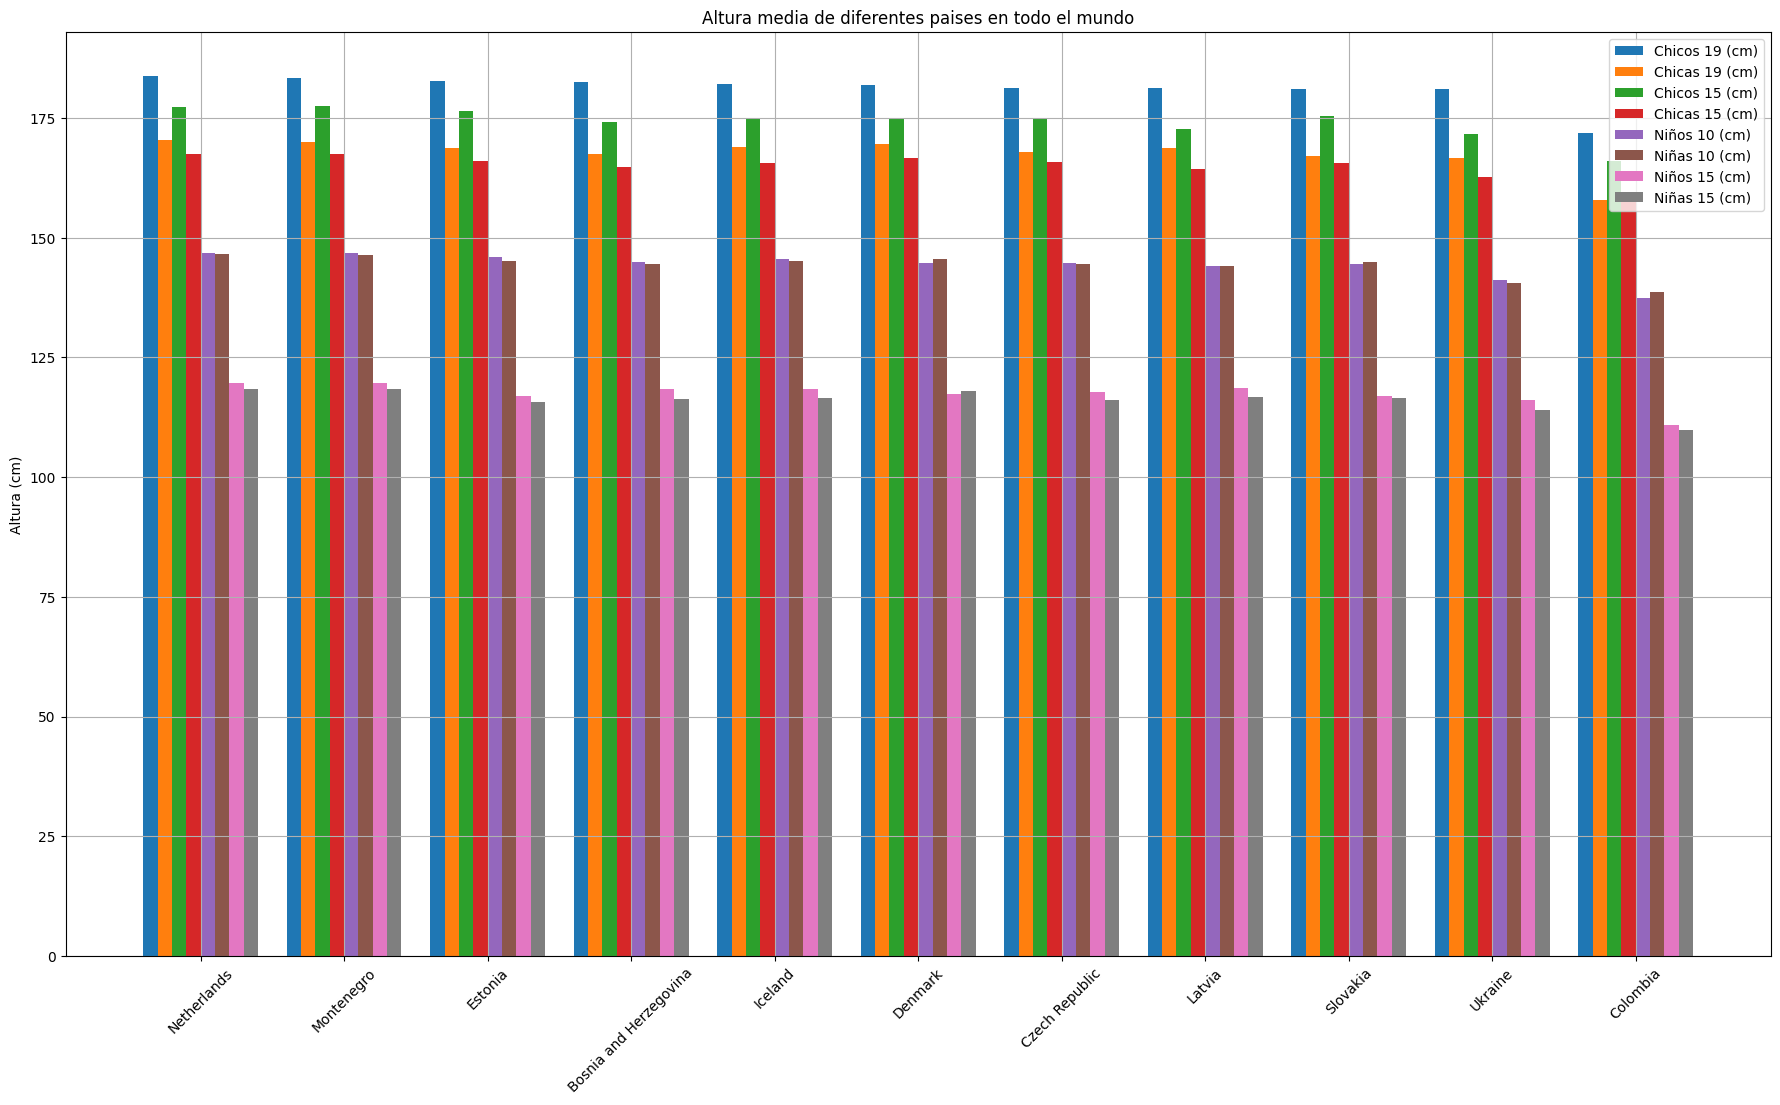

In [63]:
co = np.arange(len(Datos["País"]))
an = 0.10
fig,ax = plt.subplots(figsize = (22,12))
ax.bar(co - 3.5*an ,Datos["Chicos 19 (cm)"],an, label = "Chicos 19 (cm)")
ax.bar(co - 2.5*an ,Datos["Chicas 19 (cm)"], an, label = "Chicas 19 (cm)")
ax.bar(co - 1.5*an ,Datos["Chicos 15 (cm)"], an, label = "Chicos 15 (cm)")
ax.bar(co - 0.5*an ,Datos["Chicas 15 (cm)"], an, label = "Chicas 15 (cm)")
ax.bar(co + 0.5*an ,Datos["Niños 10 (cm)"], an, label = "Niños 10 (cm)")
ax.bar(co + 1.5*an ,Datos["Niñas 10 (cm)"], an, label = "Niñas 10 (cm)")
ax.bar(co + 2.5*an ,Datos["Niños 5 (cm)"], an, label = "Niños 15 (cm)")
ax.bar(co + 3.5*an ,Datos["Niñas 5 (cm)"], an, label = "Niñas 15 (cm)")
ax.set_xticks(co)
ax.set_xticklabels(Datos["País"])
plt.xticks(rotation = 45)
ax.set_title("Altura media de diferentes paises en todo el mundo")
ax.set_ylabel("Altura (cm)")
plt.legend()
plt.grid()
plt.show()

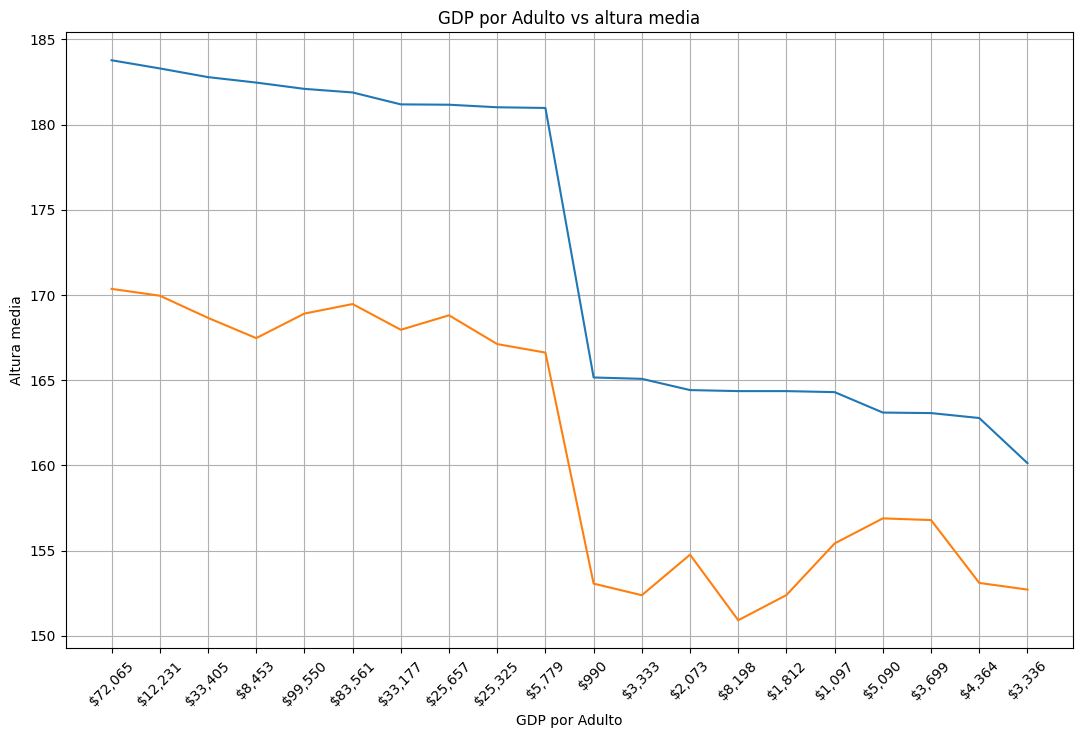

In [110]:
Riqueza = income.rename(columns= {"Country":"País", "GDP per Adult (USD)":"GDP por Adulto (USD)"})
Riqueza_1 = Riqueza[["País","GDP por Adulto (USD)"]]
Altura_1 = alturas_español[["País","Chicos 19 (cm)","Chicas 19 (cm)"]]
Tabla = pd.merge(Riqueza_1, Altura_1, on = "País", how = "inner")
Tabla_1 = Tabla.sort_values(by = "Chicos 19 (cm)" , ascending = False)
Tabla_2 = Tabla_1.head(10)
Tabla_3 = Tabla_1.tail(10)
Tabla_4 = pd.concat([Tabla_2,Tabla_3], ignore_index = True)

plt.figure(figsize = (13,8))
plt.plot( Tabla_4["GDP por Adulto (USD)"],Tabla_4["Chicos 19 (cm)"])
plt.plot( Tabla_4["GDP por Adulto (USD)"], Tabla_4["Chicas 19 (cm)"] )
plt.title("GDP por Adulto vs altura media")
plt.xlabel("GDP por Adulto")
plt.ylabel("Altura media")
plt.xticks(rotation = 45)
plt.grid()
plt.show()